# 4. 모델 훈련

## 4.1. 선형 회귀

### 4.1.1. 정규 방정식

In [ ]:
np.random.seed(42)  # 코드 예제를 재현 가능하게 만들기 위해
m = 100  # 샘플 개수
X = 2 * np.random.rand(m, 1)  # 열 벡터
y = 4 + 3 * X + np.random.randn(m, 1)  # 열 벡터

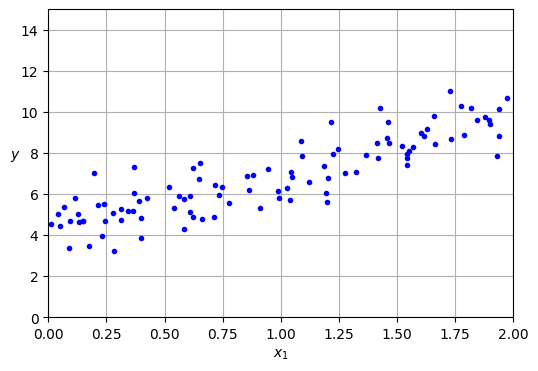

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # 각 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # 각 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

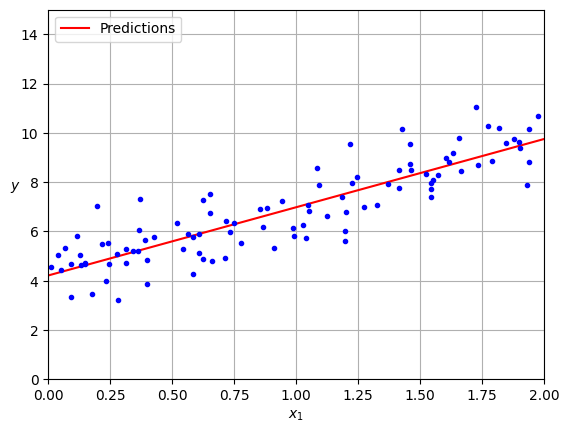

In [ ]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## 4.2. 경사하강법

### 4.2.1. 배치 경사 하강법

In [ ]:
import numpy as np

eta = 0.1  # 학습률
n_epochs = 1000  # 반복 횟수
m = 100  # 샘플 개수

np.random.seed(42)
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

X_b = np.c_[np.ones((m, 1)), X]  # x0 = 1 추가
theta = np.random.randn(2, 1)  # 모델 파라미터를 랜덤하게 초기화합니다.

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta) #y 절편, 기울기

[[4.21509616]
 [2.77011339]]


### 4.2.2. 확률적 경사 하강법

In [ ]:
n_epochs = 50              # 에포크 수
t0, t1 = 5, 50             # 학습 스케줄 하이퍼파라미터

# 학습률 스케줄 함수 정의
def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)   # 모델 파라미터 랜덤 초기화

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [ ]:
theta #y 절편, 기울기

array([[4.21076011],
       [2.74856079]])


### 4.2.3. 미니배치 경사 하강법

## 4.3. 다항 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

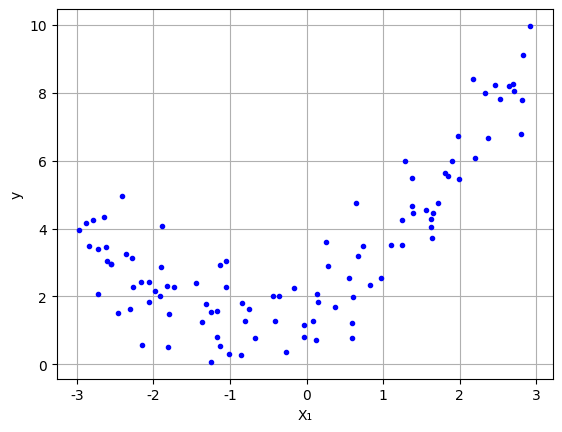

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("X₁")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ #즉, 학습된 모델은 약 0.56x²+0.93x+1.78

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

## 4.4. 학습 곡선

In [ ]:
import numpy as np

np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

In [ ]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

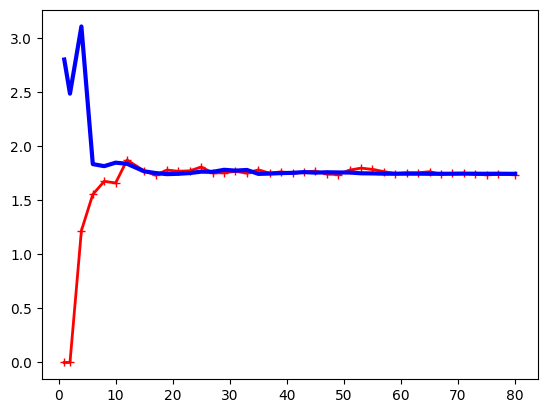

In [ ]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="훈련 세트")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="검증 세트")
plt.show() #빨간 그래프: 훈련세트, 파란 그래프: 검증 세트, 과소적합

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

np.random.seed(42)
m = 100
X = np.random.rand(m, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) * 0.1
y = y.ravel()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

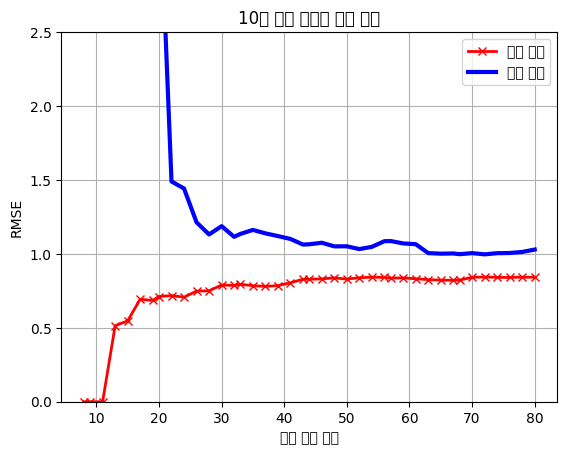

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


#데이터 생성
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

#10차 다항 회귀 모델
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

#학습 곡선 계산
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 40),
    cv=5,
    scoring="neg_root_mean_squared_error",
    shuffle=True,
    random_state=42
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

#그래프 출력
plt.rc('font', family='NanumBarunGothic')
plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="훈련 세트", marker="x")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="검증 세트")
plt.xlabel("훈련 세트 크기")
plt.ylabel("RMSE")
plt.ylim(0, 2.5)
plt.legend(loc="upper right")
plt.grid(True)
plt.title("10차 다항 회귀의 학습 곡선")
plt.show()

## 4.5. 규제가 있는 선형 모델

### 4.5.1. 릿지 회귀

In [ ]:
import numpy as np

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
from sklearn.linear_model import Ridge

import numpy as np

X = np.array([[1.0], [2.0], [3.0]], dtype=np.float64)
y = np.array([1.0, 2.0, 3.0], dtype=np.float64)
np.set_printoptions(precision=8)

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.52380952])

In [ ]:
from sklearn.linear_model import SGDRegressor
import numpy as np

X = np.array([[1], [2], [3]])
y = np.array([1, 2, 3])
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, max_iter=1000,
                       tol=None, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.5654419])

### 4.5.2. 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso

import numpy as np

X = np.array([[1], [2], [3]])
y = np.array([1, 2, 3])

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.575])

### 4.5.3. 엘라스틱넷

In [ ]:
from sklearn.linear_model import ElasticNet

import numpy as np

X = np.array([[1], [2], [3]])
y = np.array([1, 2, 3])

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.56976744])

### 4.5.4. 조기종료

In [ ]:
#  나눔고딕 폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum

#  런타임에 새로 설치한 폰트를 Matplotlib에 적용
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

#  마이너스(-) 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정
plt.rc('font', family='NanumGothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


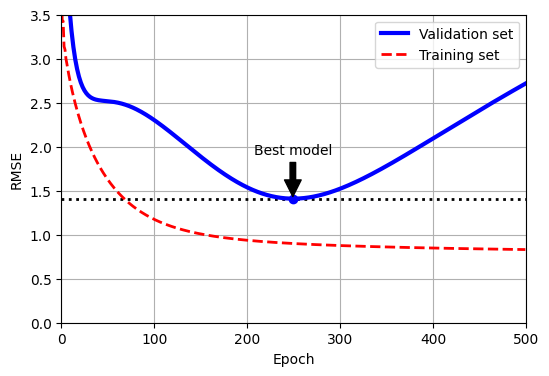

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 추가 코드 - 이전과 동일한 2차방정식 데이터셋을 생성하고 분할합니다.
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # 추가 코드 - 아래 그림을 위한 것입니다.

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = np.sqrt(mean_squared_error(y_valid.ravel(), y_valid_predict))
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # 추가 코드 - 훈련 오차를 평가하여 그림에 저장합니다.
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = np.sqrt(mean_squared_error(y_train.ravel(), y_train_predict))
    val_errors.append(val_error)
    train_errors.append(train_error)

# 추가 코드 - 이 섹션에서는 그림 4-20을 생성하고 저장합니다.
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

## 4.6. 로지스틱 회귀

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

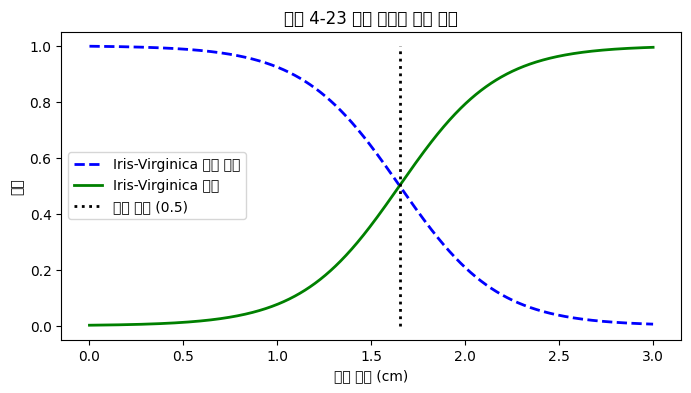

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

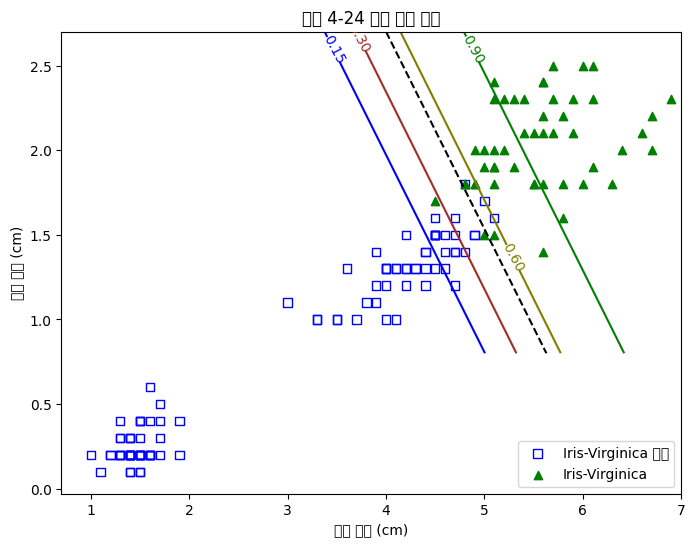

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#데이터 로드
iris = load_iris(as_frame=True)

#그림 4-23: 꽃잎 너비 하나로 로지스틱 회귀
#특성: 꽃잎 너비(petal width), 타깃: Virginica 여부
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"

#학습/테스트 분할 (랜덤 시드 고정)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#모델 훈련
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

#0~3cm 구간에 대해 확률 추정
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

#결정 경계: P(Virginica)=0.5 지점
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

# 플롯
plt.figure(figsize=(8, 4))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Iris-Virginica 아님 확률")
plt.plot(X_new, y_proba[:, 1], "g-",  linewidth=2, label="Iris-Virginica 확률")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="결정 경계 (0.5)")
plt.xlabel("꽃잎 너비 (cm)")
plt.ylabel("확률")
plt.legend(loc="center left")
plt.title("그림 4-23 추정 확률과 결정 경계")
plt.show()


# 그림 4-24: 꽃잎 길이·너비 두 특성으로 로지스틱 회귀
# 특성: 꽃잎 길이(petal length), 꽃잎 너비(petal width)
X2 = iris.data[["petal length (cm)", "petal width (cm)"]].values
y2 = iris.target_names[iris.target] == "virginica"

# 모델 훈련
log_reg2 = LogisticRegression(random_state=42)
log_reg2.fit(X2, y2)

# 결정 경계를 포함한 등고선(contour) 그리드 생성
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7.0, 200),   # 꽃잎 길이 축 범위
    np.linspace(0.8, 2.7, 200)    # 꽃잎 너비 축 범위
)
X_grid = np.c_[x0.ravel(), x1.ravel()]
y_proba2 = log_reg2.predict_proba(X_grid)[:, 1].reshape(x0.shape)

# 플롯
plt.figure(figsize=(8, 6))
# 15%, 30%, 60%, 90% 확률 등고선
contours = plt.contour(
    x0, x1, y_proba2,
    levels=(0.15, 0.30, 0.60, 0.90),
    colors=('b', 'brown', 'olive', 'g'),
    linestyles=('solid', 'solid', 'solid', 'solid')
)
plt.clabel(contours, fmt='%1.2f', inline=1, fontsize=10)

# 50% 결정 경계(점선)
boundary = plt.contour(
    x0, x1, y_proba2,
    levels=(0.5,),
    colors='k',
    linestyles=('--',)
)

# 산점도: True→▲, False→■
plt.scatter(X2[y2 == False, 0], X2[y2 == False, 1],
            marker='s', edgecolor='b', facecolor='none',
            label="Iris-Virginica 아님")
plt.scatter(X2[y2 == True,  0], X2[y2 == True,  1],
            marker='^', color='g',
            label="Iris-Virginica")

plt.xlabel("꽃잎 길이 (cm)")
plt.ylabel("꽃잎 너비 (cm)")
plt.legend(loc="lower right")
plt.title("그림 4-24 선형 결정 경계")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE B

predict: [2]
predict_proba: [[0.   0.04 0.96]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

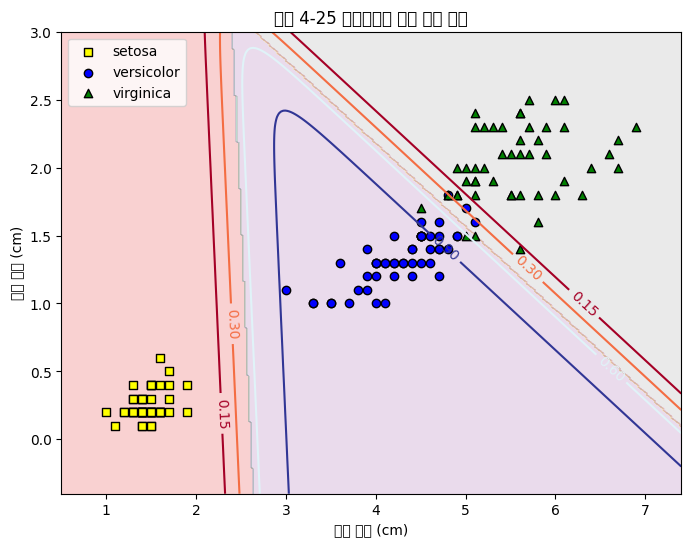

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 로드 및 전처리
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

# 학습/테스트 분할 (랜덤 시드 고정)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 소프트맥스 회귀 모델 훈련
softmax_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    C=30,
    random_state=42
)
softmax_reg.fit(X_train, y_train)

# 예측 예시 (꽃잎 길이=5cm, 너비=2cm)
print("predict:", softmax_reg.predict([[5, 2]]))
print("predict_proba:", softmax_reg.predict_proba([[5, 2]]).round(2))

#  결정 경계 및 확률 등고선 그리기
# 1) 그리드 생성
x0_min, x0_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
x1_min, x1_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx0, xx1 = np.meshgrid(
    np.linspace(x0_min, x0_max, 300),
    np.linspace(x1_min, x1_max, 300)
)
X_grid = np.c_[xx0.ravel(), xx1.ravel()]

# 2) 각 그리드 점에 대한 클래스별 확률
probas = softmax_reg.predict_proba(X_grid)

# 3) 결정 경계: 가장 높은 확률 클래스
y_pred = np.argmax(probas, axis=1).reshape(xx0.shape)

# 4) 배경(결정 영역) 표시
plt.figure(figsize=(8, 6))
plt.contourf(xx0, xx1, y_pred, alpha=0.2, cmap=plt.cm.Set1)

# 5) Iris-Versicolor(class=1)에 대한 확률 등고선 (15%, 30%, 60%, 90%)
cs = plt.contour(
    xx0, xx1, probas[:, 1].reshape(xx0.shape),
    levels=(0.15, 0.30, 0.60, 0.90),
    linestyles='solid',
    cmap=plt.cm.RdYlBu
)
plt.clabel(cs, fmt='%1.2f')

# 6) 실제 샘플 산점도
markers = ['s', 'o', '^']
colors  = ['yellow', 'blue', 'green']
for idx, marker, color, name in zip(range(3), markers, colors, iris.target_names):
    plt.scatter(
        X[y == idx, 0], X[y == idx, 1],
        marker=marker, color=color,
        edgecolor='k', label=name
    )

plt.xlabel("꽃잎 길이 (cm)")
plt.ylabel("꽃잎 너비 (cm)")
plt.title("그림 4-25 소프트맥스 회귀 결정 경계")
plt.legend(loc="upper left")
plt.show()